# 聚类分析
- 系统聚类
- K-means算法
- K-mediods算法
- DBSCAN算法

## 距离
- 点和点之间的距离
- 常见距离
  - 欧几里得距离
  - 曼哈顿距离
  - 切比雪夫距离
  - 明可夫斯基距离

In [ ]:
a = matrix(runif(25),c(5,5))  # 生成随机5*5矩阵
a

In [ ]:
dist(a, "manhattan")  # 计算曼哈顿距离

In [ ]:
dist(a,p=2)  # 计算欧几里得距离

In [ ]:
dist(a,p=1)

In [ ]:
dist(a, "minkowski")  # 明科夫斯基距离

In [ ]:
a = matrix(runif(15),c(3,5))  # 3*5矩阵
a

In [ ]:
dist(a,"minkowski")
dist(a,p=2)
dist(a)
dist(a,"manhattan")

In [ ]:
# ?dist

## 余弦相似性
- 更注重向量在方向上的差异，而非距离或长度上
- 对于高维的文字向量，经常采用余弦相似性

In [ ]:
a = c(10, 9, 8)
b = c(4,3,2)
c = c(8,9,10)

In [ ]:
sum(a*b)/sqrt(sum(a^2)*sum(b^2))  # a,b间的余弦相似性
sum(a*c)/sqrt(sum(a^2)*sum(c^2))  # a,c间的余弦相似性
sum(b*c)/sqrt(sum(b^2)*sum(c^2))  # b,c间的余弦相似性

In [ ]:
x = rbind(a,b,c)
x

In [ ]:
# 计算a,b,c之间的欧氏距离
dist(x,p=2)
dist(x)

## 系统聚类（层次聚类）
- 凝聚
  - 自底向上的聚类
  - 每一项自成一类
  - 迭代，将最近的两类合为一类
  - 常用
- 分裂
  - 自顶向下的聚类
  - 将所有项看做一类
  - 找出最不相似的项分裂出去成为两类
- 不需事先指定k值
- 展示不同聚类数下的聚类结果
  - 树状图
- 样本点较少，树状图查看分类
- 样本数较多，树状图横着看
- 样本点特别多，效率低，使用K-means聚类

## 连接（linkage）
- 类和类之间的距离
- 常见方法
  - 最短距离法（简单距离）
  - 最长距离法（完全距离）
  - 重心法（质心法）
  - 离差平方和法（word法）
    - 反映差异程度
  - 类平均法
  - 中间距离法

## 建模流程
- 加载数据（read.table）
  - x = read.table('xx.txt', header=T, sep=' ')
- 描述分析（summary）
- 标准化（scale） 
  - xstd = scale(x)
- 计算距离（dist）
  - d = dist(xstd)
- 系统聚类（hclust）
  - hc = hclust(d, "single")  # 默认complete，最长距离
- 绘制谱系图
  - plot(hc, hang=-1)

### 读入数据

In [ ]:
beer=read.table("beer_data.txt",header=T,sep=" ")
beer=as.matrix(beer)
beer # 注意beer为字符串格式

### 描述分析

In [ ]:
x=apply(beer[,2:5],2,as.numeric)  # 取2-5列，并转为数字
rownames(x)=beer[,1]  # 指定行名
x
summary(x)

### 标准化

In [ ]:
#因为不同变量取值差别较大，故将数据标准化
xstd=scale(x)
summary(xstd)

### 计算距离

In [ ]:
d=dist(xstd)

### 系统聚类

In [ ]:
hc1=hclust(d,"single")  #最短距离法
hc2=hclust(d,"complete")#最长距离法，R中默认的联接方法
hc3=hclust(d,"ward.D")  #ward法 即离差平方和的方法，反映样本之间的差异程度
hc4=hclust(d,"centroid")#重心法

### 绘制谱系图

In [ ]:
####绘制谱四种联结方法得到的谱系图####
par(mfrow=c(1,1))#设置画布，如可以绘制2*2的组图。
#par(family='STKaiti')#设置字体
plot(hc1,hang=-1)#最短距离法的谱系图

In [ ]:
plot(hc2,hang=-1)#最长距离法的谱系图

In [ ]:
cutree(hc2, k=4)  # 查看数据所在类别

## k-means 聚类
- 步骤
  - 确定K值
  - 随机选k个点为质心
  - 计算各个点到质心的距离
  - 将点的类别划分为离他最接近的质心，形成K个cluster
  - 根据分类好的cluster，在每个cluster内计算新的质心
  - 迭代，直到收敛（新旧中心变化小于设定阈值）
- 演示链接
 - https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- 缺点
 - K值确定
 - 复杂度与样本呈线性关系
 - 很难发现任意形状的簇
- 优点
 - 简单，快速
- 不稳定，结果与初始值的选择有密切关系

In [ ]:
cl=kmeans(xstd,3,20) # 聚为3类，最大迭代次数20
cl

In [ ]:
# cl$cluster
cl$centers

In [ ]:
plot(x,col=cl$cluster,pch=2,lwd=1)

In [ ]:
pairs(x, col=cl$cluster,pch=2,lwd=1)

### K的确定
- 侧影统计量（Silhouette）
 - 到划分类的距离和到未被划分类的距离的差异
 - sw值越大效果越好，用于确定聚类个数K
 - sw>0.5,可以进行合理的聚类
 - sw<0.2,不存在很好的聚类结构
- 计算SSE

## K-mediods
- K-means改进版
- 区别
  - 不采取样本的均值作为中心 
  - 采用一簇中最中心的对象作为中心
  - 质心必须始终是某个具体的样本点
- 复杂度高于k-means
  - O(n^2)
  - k-means:O(n)
- 步骤
  - 确定K值
  - 随机选k个点为质心
  - 计算各个点到质心的距离
  - 将点的类别划分为离他最接近的质心，形成K个cluster
  - 根据分类好的cluster，在每个cluster内计算新的质心
    - 计算cluster内所有样本点到其中一个样本点的曼哈顿距离和（绝对误差）
    - 选出是cluster绝对误差最小的样本点作为质心
  - 迭代，直到收敛（新旧中心变化小于设定阈值）

In [ ]:
head(iris)  #展示iris数据的5个变量和前几行样本观测值
iris2<-iris[,1:4]
iris.kmeans<-kmeans(iris2,3)
iris.kmeans

In [ ]:
#用table函数查看分类结果情况
table(iris$Species,iris.kmeans$cluster)

In [ ]:
plot(iris2$Sepal.Length,iris2$Sepal.Width,col=iris.kmeans$cluster,pch="*")
points(iris.kmeans$centers,pch="X",cex=1.5,col=4)

In [ ]:
# install.packages("cluster",repos="https://mirror.lzu.edu.cn/CRAN/")

In [ ]:
data=iris[,1:4]#取数据的前四列
#install.packages("cluster",repos="https://mirror.lzu.edu.cn/CRAN/")
library(cluster)# 加载包
pam3=pam(data,3)#k-mediod聚类方法，pam算法
pam3
table(iris$Species,pam3$clustering)

In [ ]:
pam3$silinfo$avg.width#查看silhouette width均值

In [ ]:
si3=silhouette(pam3)#查看每个silhouette统计量
plot(pam3)#Silhouette　Plot

In [ ]:
pam4 = pam(data,4)
plot(pam4)

### 基于Clara算法的聚类
- 数据集大

In [ ]:
iris2.clara<-clara(iris2,3)
table(iris$Species,iris2.clara$clustering)
 
#             1  2  3
# setosa     50  0  0
# versicolor  0 48  2
# virginica   0 13 37
 
layout(matrix(c(1,2),1,2)) #每页显示两个图
plot(iris2.clara)
layout(matrix(1))

### 基于Clara算法的聚类

In [ ]:
install.packages("fpc",repos="https://mirror.lzu.edu.cn/CRAN/")

In [ ]:
#install.packages("fpc",repos="https://mirror.lzu.edu.cn/CRAN/")
library(fpc)
iris2.pamk<-pamk(iris2)
table(iris2.pamk$pamobject$clustering,iris$Species)
 
 
layout(matrix(c(1,2),1,2)) #每页显示两个图
plot(iris2.pamk$pamobject)
layout(matrix(1))
 
#     setosa versicolor virginica
# 1     50          1         0
# 2      0         49        50
 
#通过上述分类结果可以看到，pam和calra算法分类结果基本类似，但是pamk将三类分为了两类。。

In [ ]:
dim(iris)#返回行列数
 
idx<-sample(1:dim(iris)[1],40)
iris3<-iris[idx,-5]
iris3
hc<-hclust(dist(iris3),method = "ave")  #注意hcluster里边传入的是dist返回值对象
 
plot(hc,hang=-1,labels=iris$Species[idx])  #这里的hang=-1使得树的节点在下方对齐
#将树分为3块
rect.hclust(hc,k=3)

## DBSCAN算法
- 基于密度分类的算法
- Density-Based Spatial Clustering of Applications with Noise
- 基本概念
  - 核心对象
    - 某个点的密度达到算法设定的阈值
    - r邻域内的点的数量不小于minPts
  - 邻域的距离阈值
    - 设定的半径r
  - 直接密度可达
  - 密度可达
  - 密度相连
  - 边界点
  - 噪声点（离群点）
- 优点
  - 不需要指定簇的个数
  - 可以发现任意形状的簇
  - 擅长找到离群点
  - 两个参数就行
- 缺点
  - 高维数据困难（降维）
  - 参数难以选择（参数对结果影响非常大）

In [ ]:
#---基于密度的聚类分析,一种方法通过fpc包中的dbscan实现；另一种方法通过factoextra包实现
library(fpc)
iris2<-iris[-5]
ds<-dbscan(iris2,eps=0.43,MinPts = 5)
table(ds$cluster,iris$Species)
 
#打印出ds和iris2的聚类散点图
plot(ds,iris2)

In [2]:
install.packages("factoextra",repos="https://mirrors.tongji.edu.cn/CRAN/")

Installing package into ‘/usr/lib64/R/library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘readr’, ‘haven’, ‘curl’, ‘RcppEigen’, ‘pbkrtest’, ‘rio’, ‘lme4’, ‘car’, ‘dplyr’, ‘FactoMineR’, ‘ggpubr’, ‘tidyr’

Warning message in install.packages("factoextra", repos = "https://mirrors.tongji.edu.cn/CRAN/"):
“installation of package ‘readr’ had non-zero exit status”Warning message in install.packages("factoextra", repos = "https://mirrors.tongji.edu.cn/CRAN/"):
“installation of package ‘curl’ had non-zero exit status”Warning message in install.packages("factoextra", repos = "https://mirrors.tongji.edu.cn/CRAN/"):
“installation of package ‘RcppEigen’ had non-zero exit status”Warning message in install.packages("factoextra", repos = "https://mirrors.tongji.edu.cn/CRAN/"):
“installation of package ‘dplyr’ had non-zero exit status”Warning message in install.packages("factoextra", repos = "https://mirrors.tongji.edu.cn/CRAN/"):
“installation of package ‘haven’ had non-zero exit sta

In [ ]:
plot(ds,iris2[,c(1,4)])

In [ ]:
plotcluster(iris2,ds$cluster)

In [3]:
#载入包
library(factoextra)
library(ggplot2)
data("multishapes")
df <- multishapes[, 1:2]
df0<-multishapes
df0$shape<-as.factor(df0$shape)
ggplot(df0,aes(x=x,y=y,colour=shape))+geom_point()

ERROR: Error in library(factoextra): there is no package called ‘factoextra’


## EM 算法
- 高斯混合模型
- 软聚类方法
- GMM是K-means的变种
- 假设数据服从高斯混合模型，即数据可由K个单个高斯分布生成
- 单个高斯分布
- 文本分析用的比较多

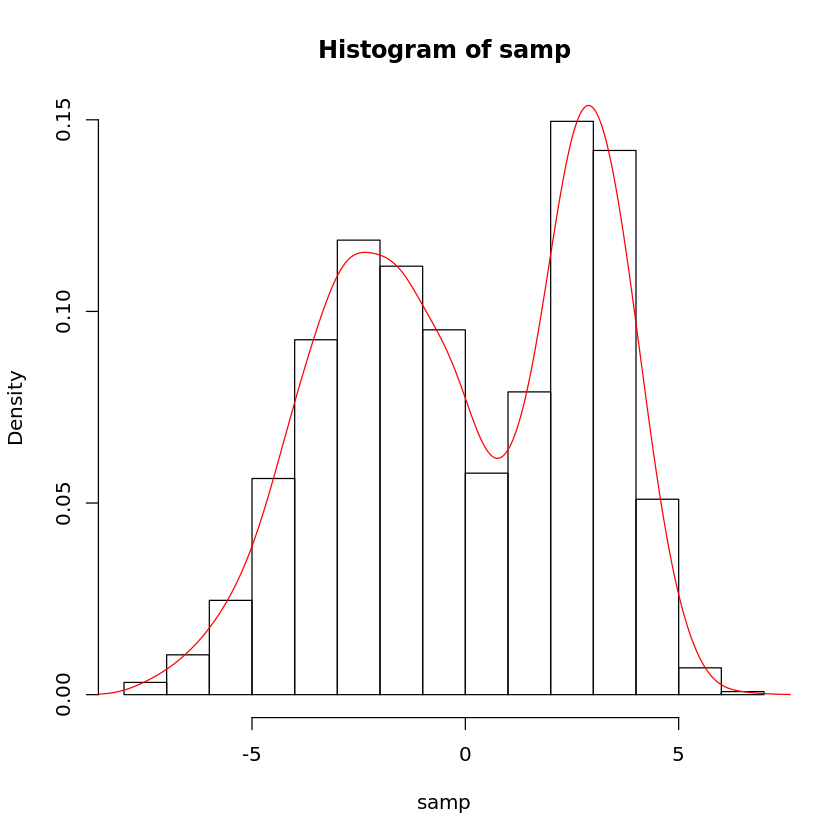

In [6]:
#【模拟样本】指定2个高斯分布的参数，并令其以0.4和0.6的权重随机生成5000个样本
# 生成n=5000的样本samp
set.seed(637351)
n <- 5000

# 权重0.4，高斯参数N(3，1)
alpha1 <- 0.4
miu1   <- 3
sigma1 <- 1

# 权重0.6，高斯参数N(-2，4)
alpha2 <- 0.6
miu2   <- -2
sigma2 <- 2

n1 <- floor(n*alpha1)
n2 <- n-n1

samp <-numeric(n)
samp[1:n1] <- rnorm(n1, miu1, sigma1)
samp[(n1+1):n] <- rnorm(n2, miu2, sigma2)

# 高斯混合模型的密度函数图
hist(samp, freq = FALSE)
lines(density(samp), col = 'red')  # 添加密度曲线

In [5]:
library(mclust)
mc1 <- Mclust(samp)
summary(mc1, parameters = T)

Package 'mclust' version 5.4.3
Type 'citation("mclust")' for citing this R package in publications.


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust V (univariate, unequal variance) model with 2 components: 

 log-likelihood    n df       BIC       ICL
      -11817.76 5000  5 -23678.11 -24141.67

Clustering table:
   1    2 
2910 2090 

Mixing probabilities:
        1         2 
0.5953945 0.4046055 

Means:
        1         2 
-2.069281  2.972549 

Variances:
        1         2 
3.7434272 0.9349798 

In [7]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [8]:
data=iris[,1:4]#取数据的前四列

In [9]:
library(mclust)

In [10]:
mc<-Mclust(data,3)  # 指定K值
summary(mc, parameters = T)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood   n df       BIC       ICL
       -186.074 150 38 -562.5522 -566.4673

Clustering table:
 1  2  3 
50 45 55 

Mixing probabilities:
        1         2         3 
0.3333333 0.3005423 0.3661243 

Means:
              [,1]     [,2]     [,3]
Sepal.Length 5.006 5.915044 6.546807
Sepal.Width  3.428 2.777451 2.949613
Petal.Length 1.462 4.204002 5.482252
Petal.Width  0.246 1.298935 1.985523

Variances:
[,,1]
             Sepal.Length Sepal.Width Petal.Length Petal.Width
Sepal.Length   0.13320850  0.10938369  0.019191764 0.011585649
Sepal.Width    0.10938369  0.15495369  0.012096999 0.010010130
Petal.Length   0.01919176  0.01209700  0.028275400 0.005818274
Petal.Width    0.01158565  0.01001013  0.005818274 0.010695632
[,,2]
             Sepal.Length Sepa

In [11]:
table(iris$Species,mc$classification)

            
              1  2  3
  setosa     50  0  0
  versicolor  0 45  5
  virginica   0  0 50

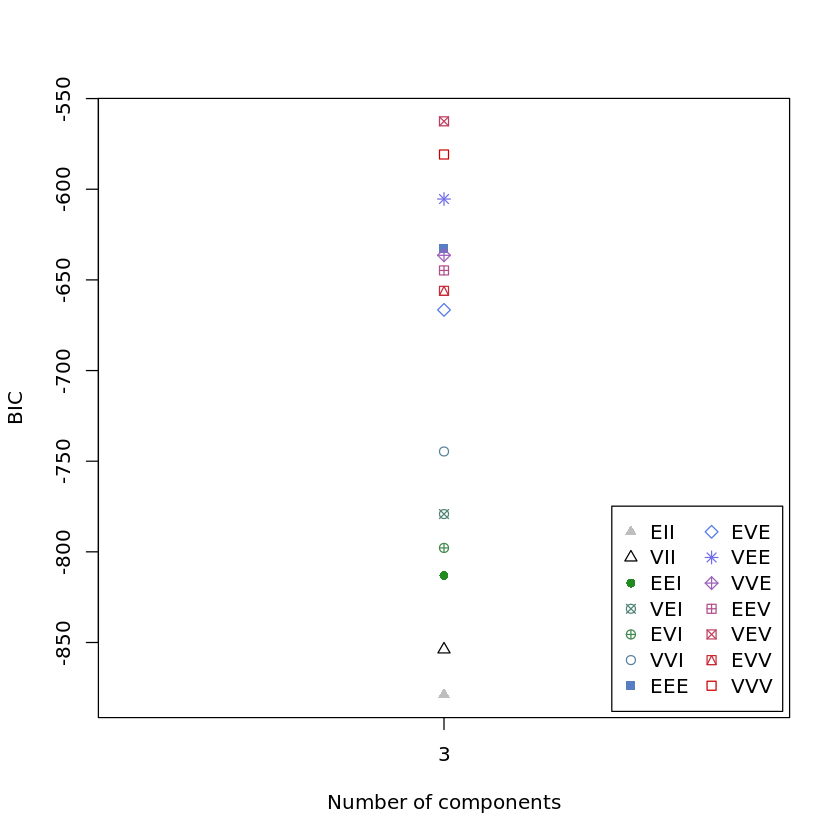

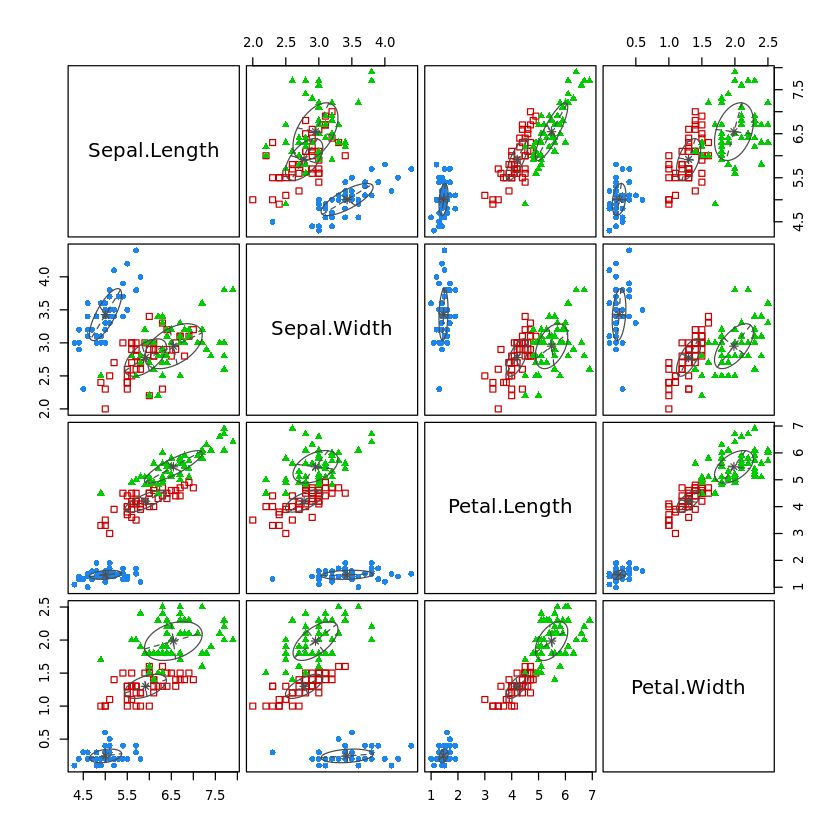

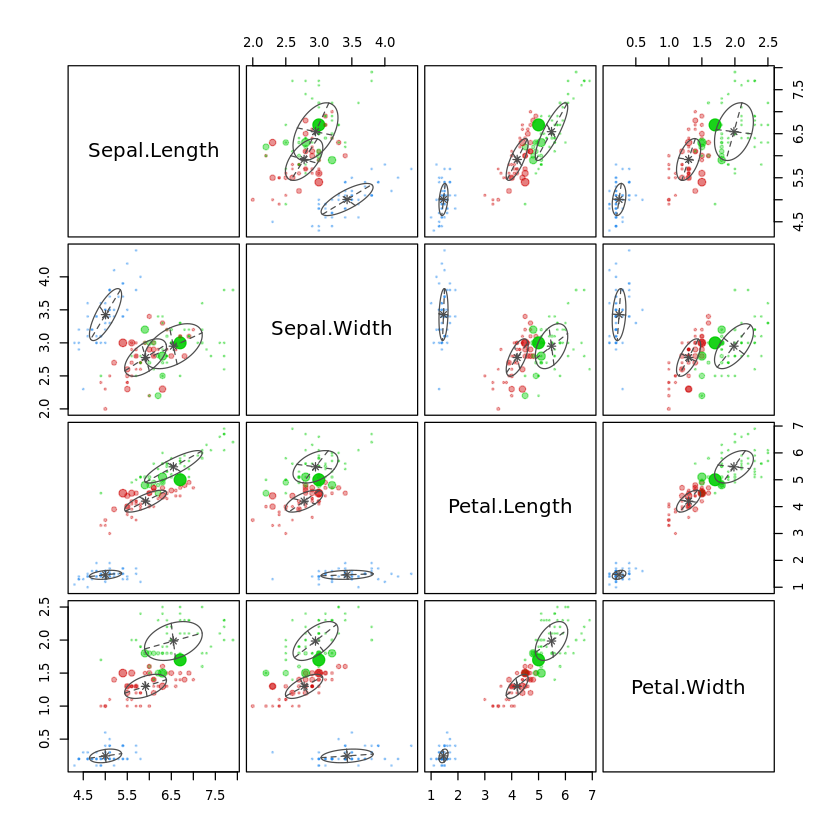

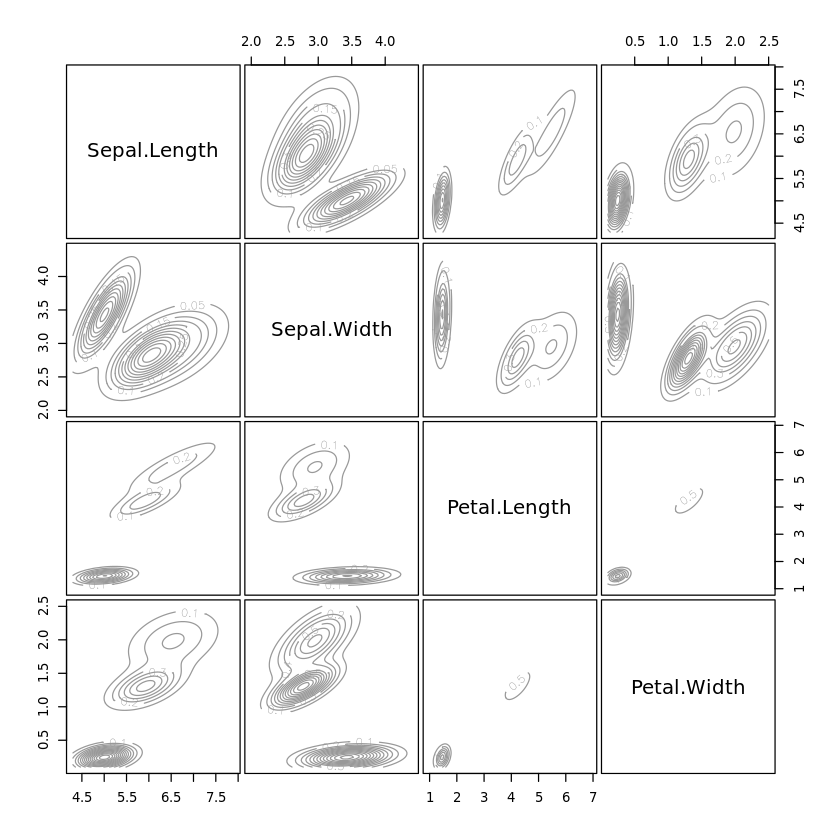

In [13]:
plot(mc)

### 样例

In [14]:
x=read.table("air.txt",header=T,fileEncoding = "GB18030")
x=as.matrix(x)
rownames(x)=c("北京","天津","石家庄","太原","呼和浩特","沈阳","长春","哈尔滨",
"上海","南京","杭州","合肥","福州","南昌","济南","郑州","武汉","长沙","广州",
"南宁","海口","重庆","成都","贵阳","昆明","拉萨","西安","兰州","西宁","银川","乌鲁木齐")


In [15]:
####描述分析####
summary(x)
dim(x)

      DUST              SO2               NO2               DAYS      
 Min.   :0.03400   Min.   :0.00600   Min.   :0.01900   Min.   :270.0  
 1st Qu.:0.07650   1st Qu.:0.02850   1st Qu.:0.03500   1st Qu.:318.0  
 Median :0.09200   Median :0.03500   Median :0.04000   Median :329.0  
 Mean   :0.09126   Mean   :0.03552   Mean   :0.04023   Mean   :328.6  
 3rd Qu.:0.10450   3rd Qu.:0.04650   3rd Qu.:0.04650   3rd Qu.:345.5  
 Max.   :0.14500   Max.   :0.05800   Max.   :0.06800   Max.   :366.0  

[1] 31  4

In [17]:
d=dist(scale(x)) 
# dist默认欧氏距离，这里用欧氏距离，是因为数据已经实施了标准化处理

In [18]:
####用不同联接方法聚类####
hc1=hclust(d,"single")  #最短距离法
hc2=hclust(d,"complete")#最长距离法，R中默认的联接方法
hc3=hclust(d,"ward.D")  #ward法
hc4=hclust(d,"centroid")#重心法

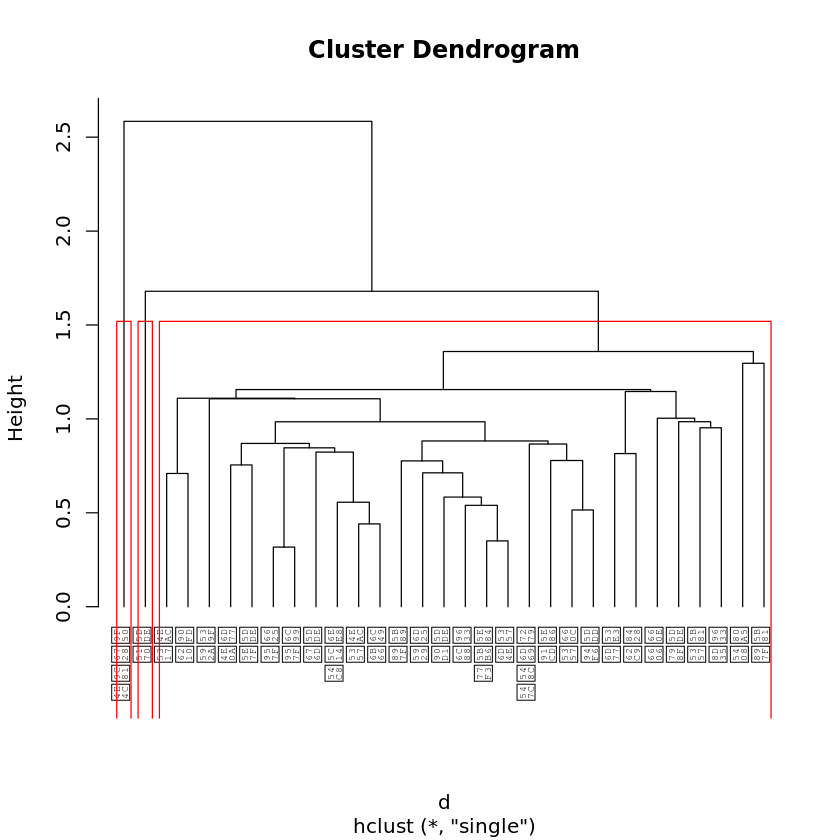

In [39]:
par(mfrow=c(1,1))#设置画布，如可以绘制2*2的组图。
par(family='STXihei')#设置字体
plot(hc1,hang=-1, family = 'STXihei')#最短距离法的谱系图
#cutree(hc1, k=3)
rect.hclust(hc1,k=3)#画出对应的图

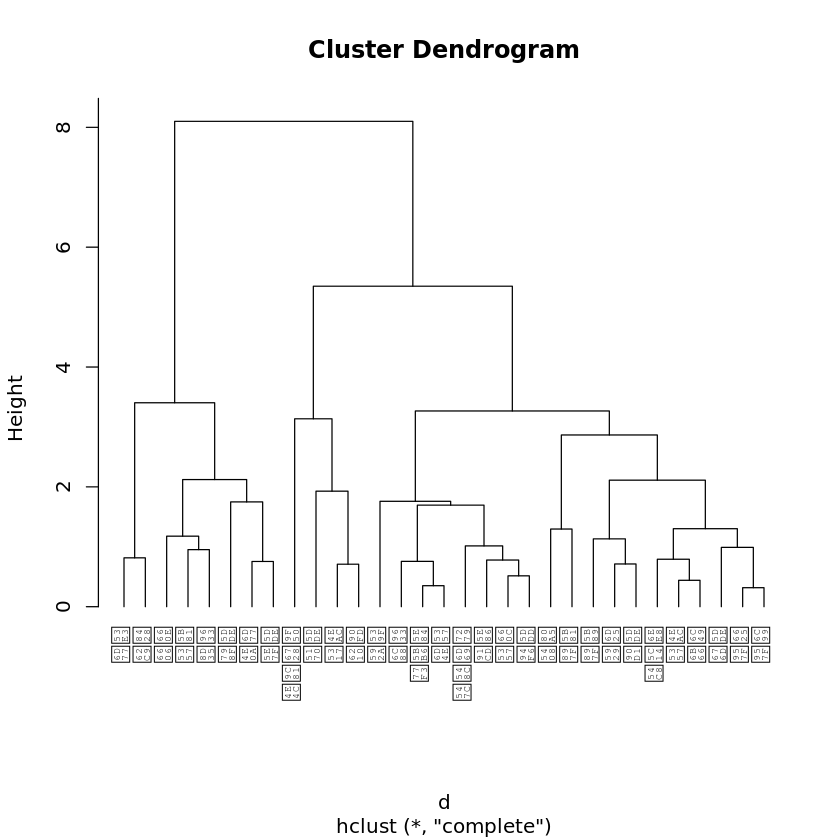

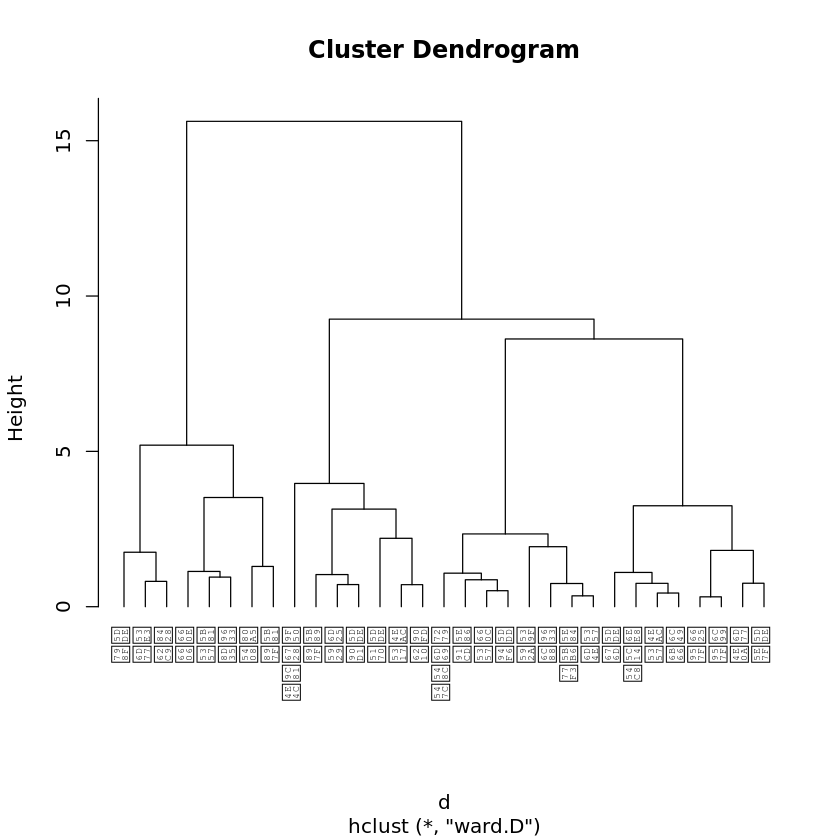

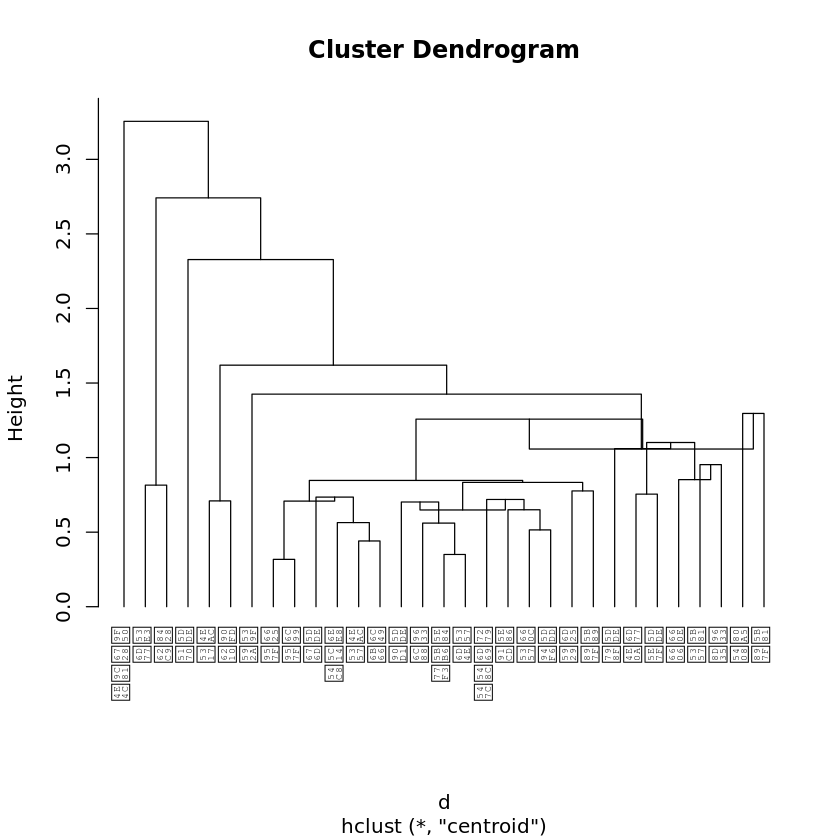

In [20]:
plot(hc2,hang=-1,family='STKaiti')#最长距离法的谱系图
plot(hc3,hang=-1)#ward法的谱系图
plot(hc4,hang=-1)#重心法的谱系图

In [23]:
cl=kmeans(x,3,20) # 聚为3类，最大迭代次数20
cl

K-means clustering with 3 clusters of sizes 9, 16, 6

Cluster means:
        DUST        SO2        NO2     DAYS
1 0.06477778 0.02244444 0.03411111 357.0000
2 0.09462500 0.04062500 0.04037500 326.6875
3 0.12200000 0.04150000 0.04900000 291.1667

Clustering vector:
    北京     天津   石家庄     太原 呼和浩特     沈阳     长春   哈尔滨 
       3        3        2        2        1        2        2        2 
    上海     南京     杭州     合肥     福州     南昌     济南     郑州 
       1        2        2        2        1        2        2        2 
    武汉     长沙     广州     南宁     海口     重庆     成都     贵阳 
       2        2        1        1        1        2        3        1 
    昆明     拉萨     西安     兰州     西宁     银川 乌鲁木齐 
       1        1        3        3        2        2        3 

Within cluster sum of squares by cluster:
[1] 590.0045 901.4418 966.8357
 (between_SS / total_SS =  86.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"

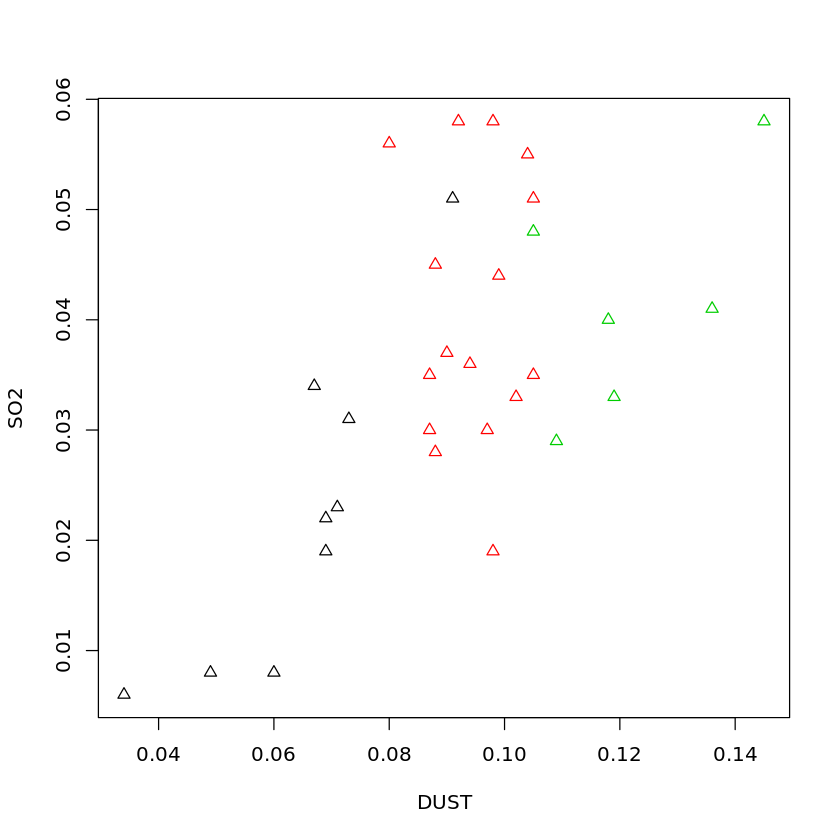

In [24]:
#par(family='STKaiti')#设置字体
plot(x,col=cl$cluster,pch=2,lwd=1) ### 用前两个变量“可吸入颗粒物”、“二氧化硫”绘制散点图，并标注三个类

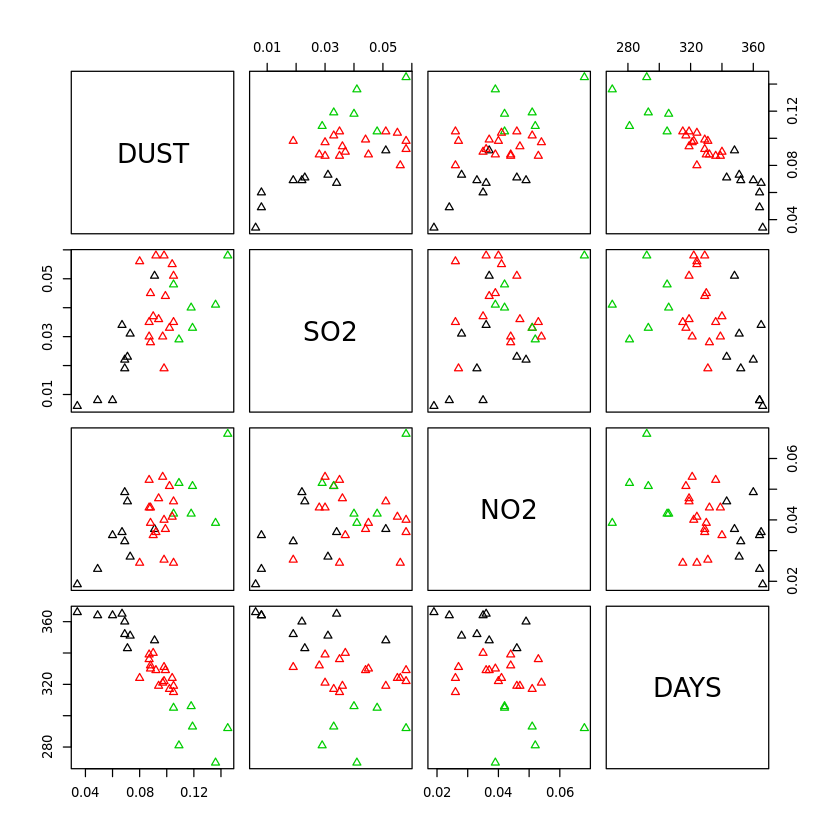

In [25]:
pairs(x,col=cl$cluster,pch=2,lwd=1)#绘制两两不同的散点图矩阵

### SSE（平法误差和）

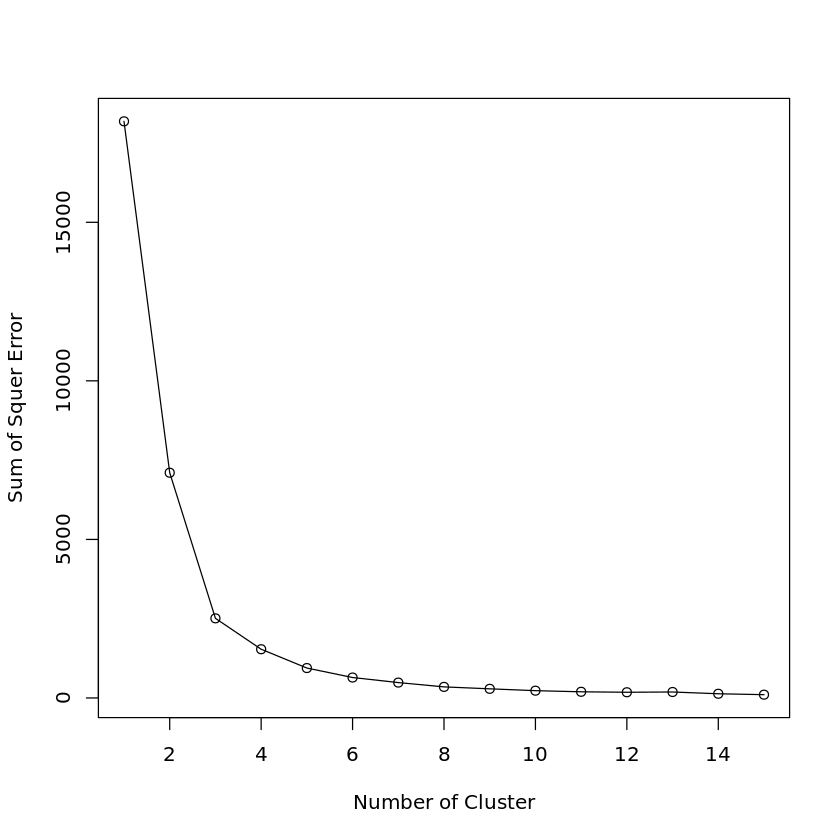

In [26]:
# 开始与结果边界
begin = 1; 
length = 15;
count = 50;
end = begin + length - 1;
 
# 结果容器
result = c();
result[begin:end] = 0;
 
# 遍历计算kmeans的SSE
for(i in begin:end) {
    # 计算SSE
    tmp = c();
    tmp[1:count] = 0;
    for(j in 1:count) {
        kcluster = kmeans(x, i);
        tmp[j] = kcluster$tot.withinss;
    }
    result[i] = mean(tmp);
}
 
# 绘制结果
plot(result, type="o", xlab="Number of Cluster", ylab="Sum of Squer Error");

### 侧影因子

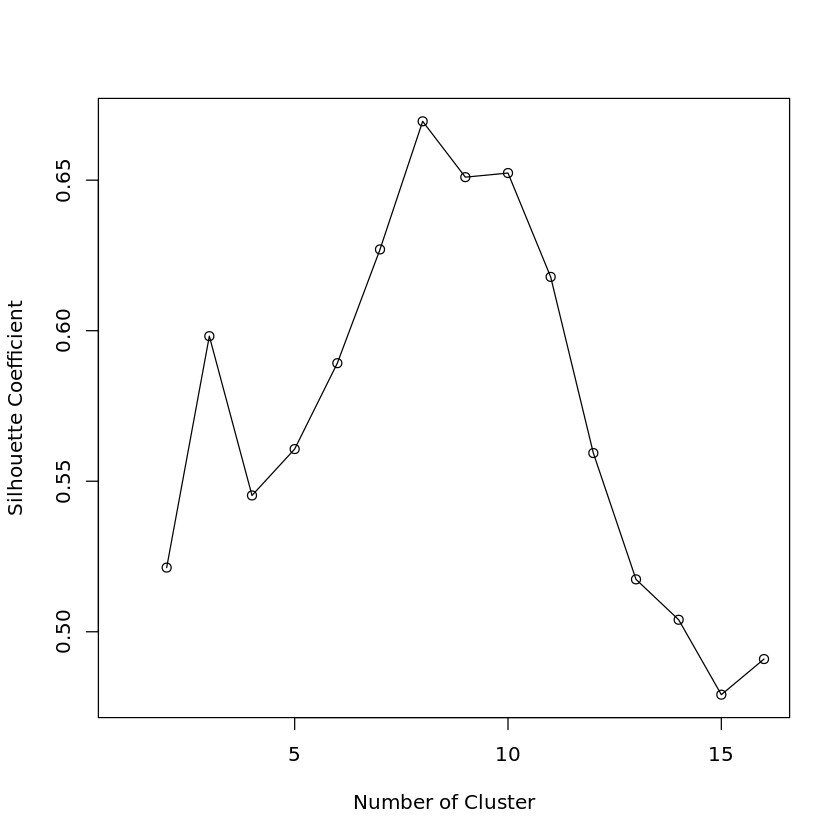

In [27]:
# 开始与结果边界
begin = 2; 
length = 15;
count = 50;
end = begin + length - 1;
 
# 结果容器
result = c();
result[begin:end] = -1;
 
# 遍历计算kmeans的SSE
library(cluster);
for(i in begin:end) {
    # Silhouette coefficient
    tmp = c();
    tmp[1:count] = 0;
    for(j in 1:count) {
        kcluster = pam(x, i);
        tmp[j] = kcluster$silinfo$avg.width;
    }
    result[i] = mean(tmp);
}
 
# 绘制结果
plot(result, type="o", xlab="Number of Cluster", ylab="Silhouette Coefficient");